   
**Название проекта - Сбрный проект - Изучение закономерностей, определяющих успешность игр**
_____
**Описание исследования.** 

Это проет магазина Стримчик. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 
    
_____
**Цель исследования.**
    
Провести анализ данных при помощи которых можно выявить определяющие успешность игры закономерности 
_____
**Задачи исследования.**
Провести предобработку данных, исследовать количество выпускаемых ирг на различных платформах, выявить влияют ли оценки пользователей и критоков на продажи. Составить портрет пользователя 
_____
**Исходные данные.**
    
Name — название игры \
Platform — платформа \
Year_of_Release — год выпуска \
Genre — жанр игры \
NA_sales — продажи в Северной Америке (миллионы проданных копий) \
EU_sales — продажи в Европе (миллионы проданных копий) \
JP_sales — продажи в Японии (миллионы проданных копий) \
Other_sales — продажи в других странах (миллионы проданных копий) \
Critic_Score — оценка критиков (максимум 100) \
User_Score — оценка пользователей (максимум 10) \
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). \
Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.
______


Для начала выполню предобработку данных \
Затем посмотрю как игры выпускались в разны годы и на разных платформах \
Посмотрю как влияют оценки пользователей и критиков на продажи \
Влияет ли на продажи рейтинг 


## 1 Открваю файл и смотрю общую информацию

In [1]:
from scipy import stats as st
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore') 

In [2]:

try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('games.csv')


In [3]:
# Общая информация по объектам файла
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [4]:
#смотрим как выглядит файл с данными
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## 2 Предобработка данных
#### 2.1 Привожу столбцы к нижнему регистру

In [5]:
df.columns = df.columns.str.lower()

#### 2.2 Оцениваю количество пропусков в таблице и устраняю пропуски

In [6]:
# количесвто пропусков в процентах
pd.DataFrame(round(df.isna().mean()*100,1,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,40.100000


In [7]:
#количество пропусков в абсолютных числах
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### 2.2.1 Удалю пропуки в столбце year_of_release т.к. их меньше 5%, приведу к int
удалю пропуски в солбце name - их всего 2

In [8]:
#удалю  пропуск name
df.dropna(subset = ['name'], inplace = True)
df.shape[0]

16713

In [9]:
#посмотрю какой процент от итоговых продаж занимают продажи где не указан год выпуска 

#посчитаю сумму продаж по регионам
df['sum_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns')

#разделю сумму продаж без года выпуска на все продажи
print(df.query('year_of_release.isnull()')['sum_sales'].sum()/df['sum_sales'].sum()*100)

1.1098034508021166


тк сумма продаж в графе с пропусками 1% и заполнить ее не представляется возможным, удаляем пропуски

In [10]:
#удалю пропуски в столбце year и проверю сколько осталось строк
df.dropna(subset = ['year_of_release'], inplace = True)
df.shape[0]

16444

In [11]:
#приведу год выпуска к типу int
df['year_of_release'] = df['year_of_release'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
 11  sum_sales        16444 non-null  float64
dtypes: float64(6), int32(1), object(5)
memory usage: 1.6+ MB


Предположу, что пропуски в рейтингах от того, что в более ранние годы рейтинг не ставили 

In [12]:
#посчитаю сколько игр в каждый год имеет рейтинг и сравню с общим количеством игра за этот год
df_no_rating = df.query('critic_score.isnull() & rating.isnull() & user_score.isnull()')\
        .groupby('year_of_release')['name'].count().reset_index()
df_rating = df.groupby('year_of_release')['name'].count().reset_index()
df_no_rating = df_no_rating.merge(df_rating, on='year_of_release', how='outer')

In [13]:
#переименую колонки
df_no_rating.columns = ['year_of_release', 'games_w/o_rating', 'total_games']


In [14]:
df_no_rating['games_w/o_rating_%'] = df_no_rating['games_w/o_rating']/df_no_rating['total_games']*100
df_no_rating

,year_of_release,games_w/o_rating,total_games,games_w/o_rating_%
0,1980,9,9,100.000000
1,1981,46,46,100.000000
2,1982,36,36,100.000000
3,1983,17,17,100.000000
4,1984,14,14,100.000000
5,1985,13,14,92.857143
6,1986,21,21,100.000000
7,1987,16,16,100.000000
8,1988,14,15,93.333333
9,1989,17,17,100.000000


До 98 года рейтинги играм почти не ставились, начиная с 99 года процен игр без гейтинг значительно снизился и к 2002 дошел до 20%, далее игра оценивались менее регулярно и за 2010-2016 примерно 40% игр не были оценены

Проверю еще одно предположение - что количество пропусков не равномерно распределено по разным платформам

In [15]:
#сделаю переменную где будут лежать только строки с пропусками в оценках
crit_nan = df.query('critic_score.isnull() & rating.isnull() & user_score.isnull()')

#сгруппирую по платформам игры с пропусками
a = crit_nan.groupby('platform')['name'].count()
#сгруппирую по платформам игры без пропусков
b = df.groupby('platform')['name'].count()

#Преобразую series в frame, чтобы объединить таблички 
crit_df = a.to_frame(name='пропуски у критиков')
total_games = b.to_frame(name='всего игр на платформе')

#объединю талички
total_games = total_games.merge(crit_df, on='platform')
#добавлю столбце с процентами пропусков
total_games['процент пропусков'] = total_games['пропуски у критиков']/total_games['всего игр на платформе']*100
total_games.sort_values(by='процент пропусков', ascending=False)

,всего игр на платформе,пропуски у критиков,процент пропусков
platform,,,
2600,116,116,100.000000
PCFX,1,1,100.000000
WS,6,6,100.000000
TG16,2,2,100.000000
SNES,239,239,100.000000
GB,97,97,100.000000
SCD,6,6,100.000000
SAT,173,173,100.000000
GEN,27,27,100.000000


Тут картина уже интереснее - некоторые платформы вообще не оцентиваются ни критиками ни пользователями. И если какие-то выпускали по 1-2 игры, то N64 и SNES выпустили больше двух сотен игр и ни одной оценки. А играли ли в них вообще? \
Удивили проценты оценок PS- казалось бы платформа на слуху и только 17% игр имеют оценки \
PSP оценено меньше половины

Вывод: связь с датой выпуска и пропуском подтвердилась для ранних годов, однако в 2003 игра без оценок было 20%, а в 2015 - 44%, почему так не ясно. Есть ряд платформ оценки на которые не ставятся вовсе или ставятся сильно реже чем на остальных. т.к. оценок нет ни от пользователей ни от критиков - предполагаю что это были не популярные игры, которые никого не заинтересовали

#### 2.2.2 Поставлю заглушку для пропусков в столбцах critic_score, user_score как 555, т.к. в user_score есть 0, чтобы не путать оцененные на 0 игры и не оцененные вовсе 
Пропуски в rating заполняю как unknown
В столбце user_score есть значение tdb - to be determied, то есть пользователь не оценил игру - приравняю это к пропуску  

In [16]:
df['critic_score'] = df['critic_score'].fillna(555)
df['user_score'] = df['user_score'].fillna(555)
df['user_score'] = df['user_score'].replace('tbd', 555)
df['rating'] = df['rating'].fillna('Unknown')
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
sum_sales          0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
 11  sum_sales        16444 non-null  float64
dtypes: float64(6), int32(1), object(5)
memory usage: 1.6+ MB


#### 2.3 Переведу столбец user_score к float тк там указаны значения с плавающей запятой

In [18]:
df['user_score'] = df['user_score'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  sum_sales        16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


#### 2.4 Проверяю на дубликаты

In [19]:
#проверю на явные дубликаты
df.duplicated().sum()

0

In [49]:
#на неявные дубликаты
df[df.duplicated(subset=['name', 'platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,2.56
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T,0.08
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,0.01


Явных дубликатов нет, в неявных разные год релиза.

Вывод: Удалены пропуски в столбце имя и дата выпуска, тк количество пропусков 1,5% не наносит вреда \ Добавлены заглушки для пропусков в оценках игр тк заполнить их не предстваляется возможным, с помощью заглушек можно будет фильтровать данные при дальнейшем анализе. \Для удобства вычислений добавлен столбец с общей суммой по всем регионам

## 3 Исследовательтский анализ

#### 3.1 Сколько игр выпускалось в разные годы

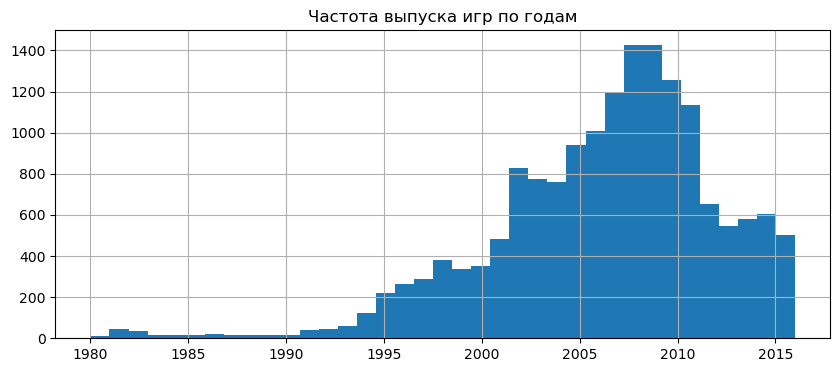

In [52]:
df['year_of_release'].hist(bins=37, figsize=(10,4))
plt.title("Частота выпуска игр по годам")
plt.show()

Удалю игры, которые выпускались для разных платформ и сохраню это в отдельной переменной

In [53]:
no_dup_game = df.drop_duplicates(subset='name')
no_dup_game.shape[0]

11426

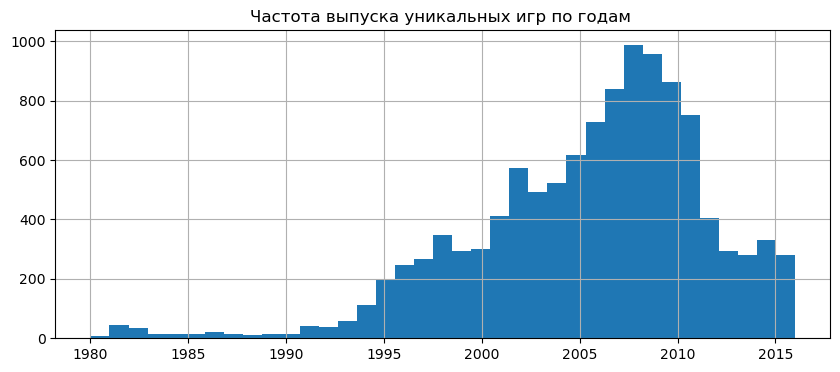

In [54]:
no_dup_game['year_of_release'].hist(bins=37, figsize=(10,4))
plt.title('Частота выпуска уникальных игр по годам ')
plt.show()

Количество игр за последние 5 лет примерно одинаково - возьму эти данные для анализа. Период с 2012-2016 \
Вместе с тем я бы задала вопрос поставщику данных т.к. знаю, что количество выпускаемых игр растет с геометрической прогрессией и спад с 2010 выглядит очень подозрительно, но работаем с тем что есть(

#### 3.2 Выбираю платформы с наибольшими суммарными продажами и стрю распределение по годам

In [55]:
df_sum_platforms = df.pivot_table(index='platform', values='sum_sales', aggfunc=['sum', 'count'])
df_sum_platforms.columns=('сумма продаж', 'количество продаж')
df_sum_platforms.sort_values(by='сумма продаж', ascending=False).head(10)

,сумма продаж,количество продаж
platform,,
PS2,1233.56,2127
X360,961.24,1232
PS3,931.34,1306
Wii,891.18,1286
DS,802.78,2121
PS,727.58,1190
PS4,314.14,392
GBA,312.88,811
PSP,289.53,1193


Выбираю 10 первых по популярности платформ - разница между PS - 6й по популярности и PS4 более чем в 2 раза

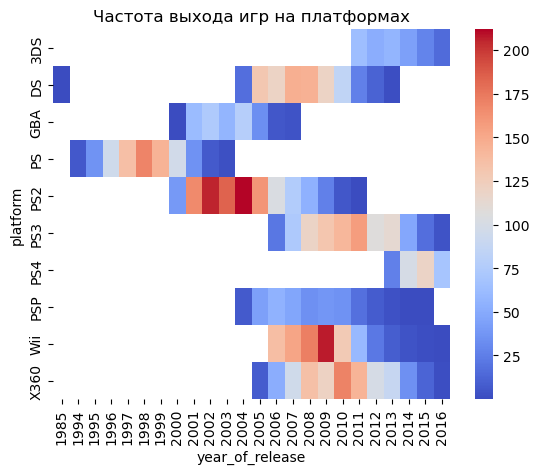

In [57]:
top_10 = df_sum_platforms.sort_values(by='сумма продаж', ascending=False).head(10)
# сохраняю в список топ 10
top_10_games = list(top_10.index)
# делаю срез
life_span = df.query('platform == @top_10_games')
life_span = life_span.pivot_table(index='platform', columns='year_of_release', values='sum_sales', aggfunc='sum')
sns.heatmap(life_span, cmap= 'coolwarm')
plt.title('Частота выхода игр на платформах')

plt.show()

Вывод: популярность держится примерно 5-6 лет, это видно по пикам на графиках. Также это подтверждается тем, например, как часто Sony PS выпускает новые консоли 5-7 лет. В такой динамично меняющейся индустрии, как компьютерные игры также не стоит брать слишком большой временной интервал

#### 3.3 Создам новую переменную куда помещу актуальные данные - то есть за период с 2012-2016

In [58]:
df_relevant = df[df['year_of_release'] >= 2012]

df_relevant.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,555.0,555.0,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,555.0,555.0,Unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


#### 3.4 Смотрю какие платформы популярны в этот период

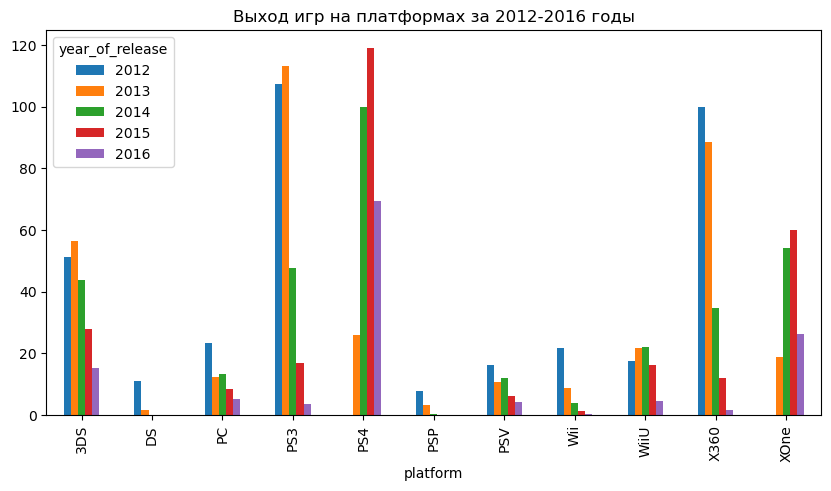

In [60]:
(
    df_relevant
    .pivot_table(index='platform', columns='year_of_release', values='sum_sales', aggfunc='sum')
    .plot(kind='bar', figsize=(10,5))
)
plt.title('Выход игр на платформах за 2012-2016 годы')
plt.show()

с 2012 по 2016 в тройке лидеров PS3, PS4 и X360, хотя последний как раз свою популярность начал терять к 2016. \
топ 5 PS3, PS4, X360, ХOne и 3DS , более популярной к 2016 была PS4 \
Возьму 3 платформы с наибольшей суммой прибыли в 2016 -PS4, ХOne и 3DS и построю для них отдельные графики по сумме продаж и количеству 

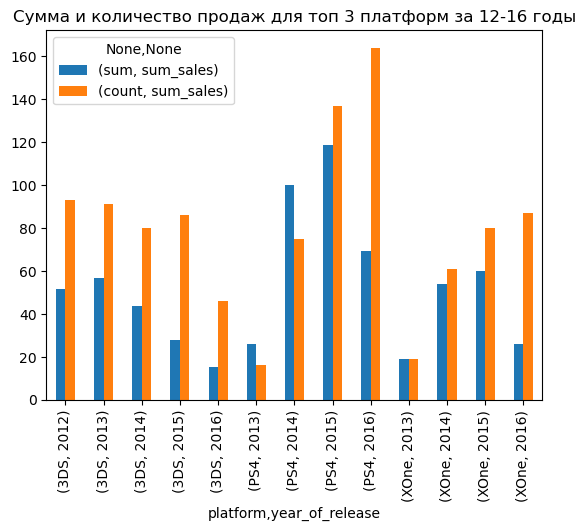

In [61]:
(
    df_relevant.query('platform == "PS4" | platform == "XOne" | platform == "3DS"')
    .pivot_table(index=['platform','year_of_release'], values='sum_sales',aggfunc=['sum', 'count'])
    .plot(kind='bar')
)
plt.title('Сумма и количество продаж для топ 3 платформ за 12-16 годы')
plt.show()

PS4 и XOne выглядят как потенциально прибыльные, прказывают показывают максимальное количество в 2015, количество продажи к 2016 году увелисчивается, построю для них диаграмму размаха

#### 3.5 График «ящик с усами» по глобальным продажам игр в разбивке по платформами


In [62]:
#выделю топ 10
(
    df_relevant.pivot_table(index='platform', values='sum_sales', aggfunc='sum')
    .sort_values(by='sum_sales', ascending=False).head(10)
)

,sum_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


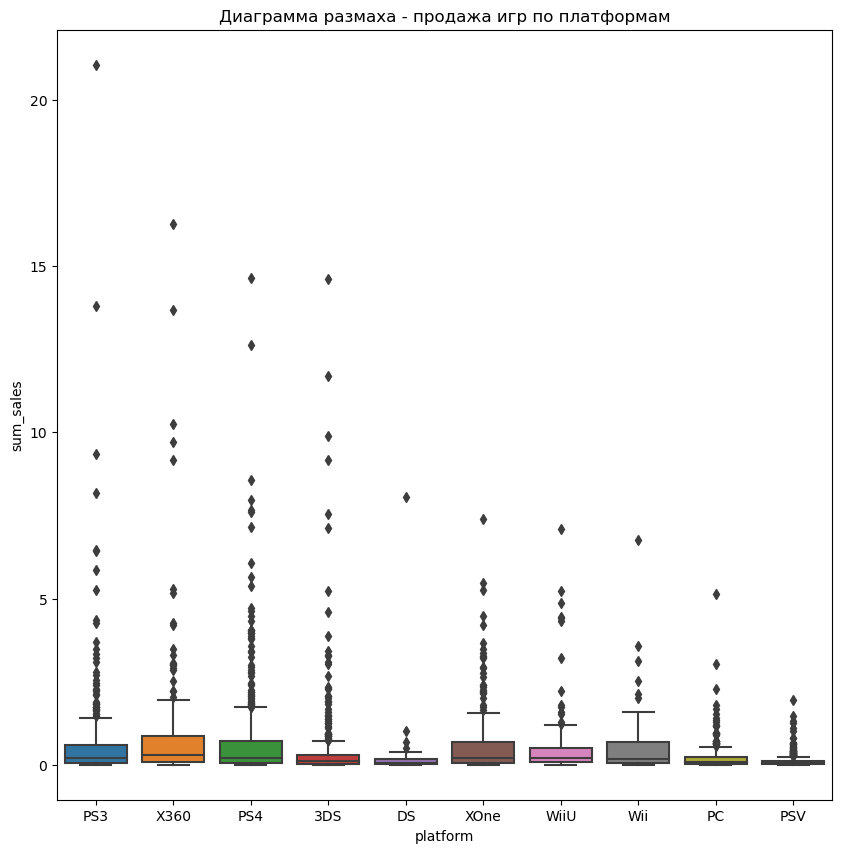

In [63]:

top_10_relevent = (
    df_relevant.pivot_table(index='platform', values='sum_sales', aggfunc='sum')
    .sort_values(by='sum_sales', ascending=False)
)
    # смотою топ 10, исключаю PSP
plt.figure(figsize=(10, 10))

sns.boxplot(data=df_relevant.query('platform != "PSP"'), x='platform', y='sum_sales')
plt.title('Диаграмма размаха - продажа игр по платформам')


plt.show()


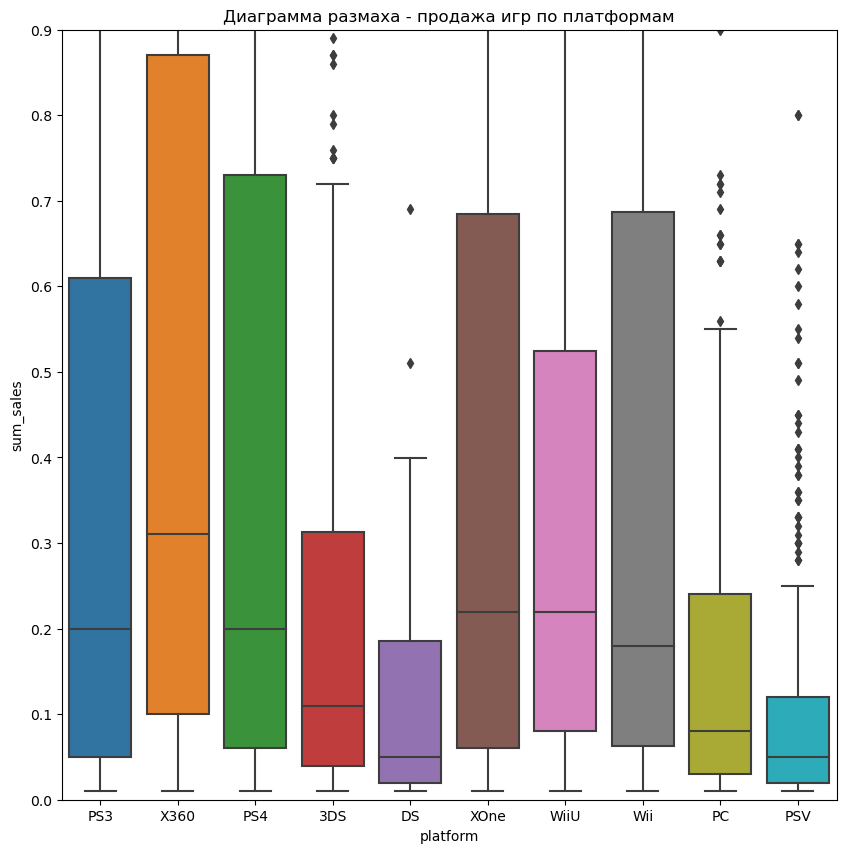

In [64]:
#видно плохо, немного уведичим масштаб
plt.figure(figsize=(10, 10))

sns.boxplot(data=df_relevant.query('platform != "PSP"'), x='platform', y='sum_sales')
plt.title('Диаграмма размаха - продажа игр по платформам')

plt.ylim([0,0.9])
plt.show()

В топ входят X360, PS4, XOne, Wii \
Х360 самое большое медианное значение и 75 квантиль, и большая часть значений уместилась в "ящик", не в выбросы \
PS4, PS 3, XOne, Wii на втром месте, PS4 медиана меньше чем у Х360, но больше значений в выбросах, продажи менее плавно распределены и много больших продаж за пределами "ящика" - много эксключзивных игр\

Отстающие: \
PSV продажи распределены не плавно, медиана около 0,2 \
DS медиана около нижней границы ящика и около 0,1 - основная часть проаж меньше 0,3 \


In [38]:
print(df_relevant[df_relevant['platform'] == 'PS4']['sum_sales'].describe())
print(df_relevant[df_relevant['platform'] == 'XOne']['sum_sales'].describe())
print('XOne -  продаж млн копий с 2012 - 2016:',df_relevant[df_relevant['platform'] == 'XOne']['sum_sales'].sum())
print('PS4  -  продаж млн копий с 2012 - 2016:',df_relevant[df_relevant['platform'] == 'PS4']['sum_sales'].sum())

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: sum_sales, dtype: float64
count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: sum_sales, dtype: float64
XOne -  продаж млн копий с 2012 - 2016: 159.32
PS4  -  продаж млн копий с 2012 - 2016: 314.14


Сравним 2 платформы: 
- PS4 - медианное количество проданных копий 200 тыс, на 20 тыс меньше чем у XOne 
- PS4 - среднее количество проданных копий 801 тыс, у XOne 645 
- PS4 - граница 75% всех продаж - 730 тыс, XOne - 685 

Игры на обе платформы начали продавать с 2013 года и общие продажи PS4 в 2 раза превышают продажи XOne \
PS4 выглядит более успешной

#### 3.6 Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

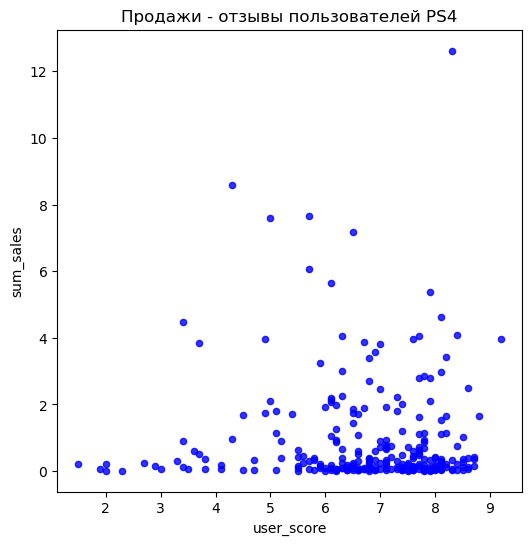

Корреляция: -0.031957110204556376


In [66]:
# не считаю заглушку 555
ps4_u_score = df_relevant[(df_relevant["user_score"] < 555) & (df_relevant["platform"] == "PS4")]
ps4_u_score.plot(x='user_score', y='sum_sales', kind='scatter', color="Blue",figsize=(6,6), alpha=0.8)
plt.title('Продажи - отзывы пользователей PS4')
plt.show()
print('Корреляция:',ps4_u_score['user_score'].corr(ps4_u_score['sum_sales']))

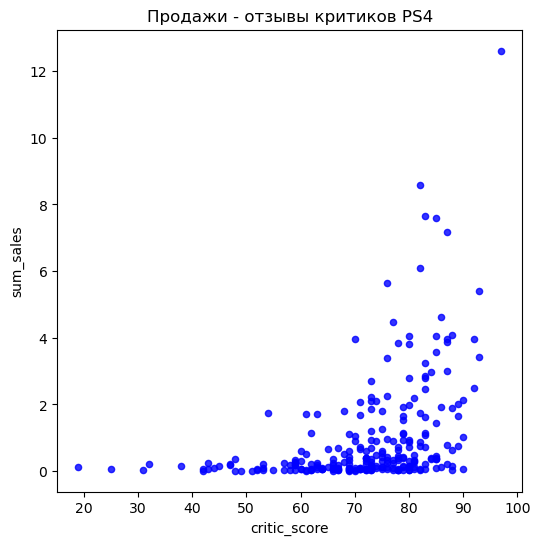

Корреляция: 0.40656790206178095


In [67]:
(
    df_relevant[(df_relevant["critic_score"] < 555) & (df_relevant["platform"] == "PS4")]
    .plot(x='critic_score', y='sum_sales', kind='scatter', color="Blue",figsize=(6,6), alpha=0.8)
)
plt.title('Продажи - отзывы критиков PS4')
plt.show()
ps4_c_score = df_relevant[(df_relevant["critic_score"] < 555) & (df_relevant["platform"] == "PS4")]
print('Корреляция:', ps4_c_score["critic_score"].corr(ps4_c_score["sum_sales"]))

Корреляции между отзывами пользователей и продажами нет. Пользовательские отзывы не имеют связи с продажей игр \
Корреляция между отзывами критиков и продажами - прямая, слабая. 

#### 3.7 Соотнесите выводы с продажами игр на других платформах. \
В топ 5 лидерах были PS3, PS4, X360, ХOne и 3DS 

Графики для PS3


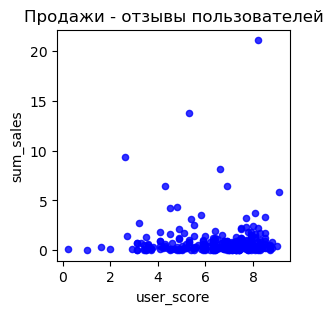

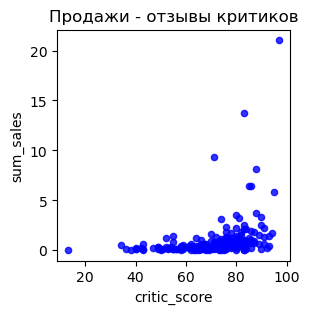

Корреляция с оценками пользователей: -0.005143522887113828
Корреляция с оценками критиков: 0.3314972592629587

Графики для X360


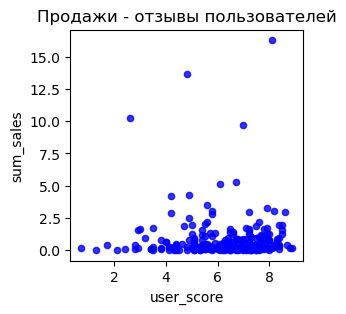

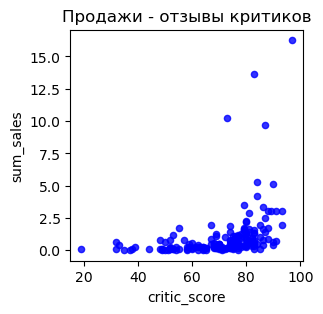

Корреляция с оценками пользователей: 0.006163978646213326
Корреляция с оценками критиков: 0.3605734888507336

Графики для XOne


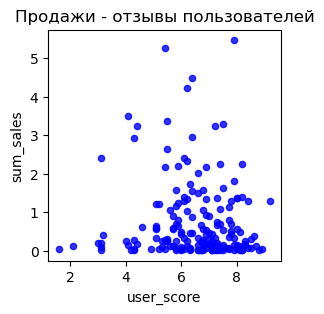

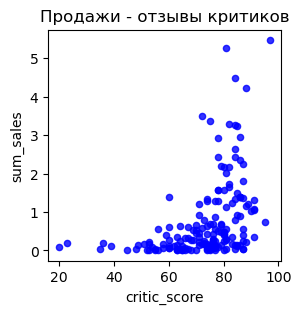

Корреляция с оценками пользователей: -0.06892505328279414
Корреляция с оценками критиков: 0.4169983280084017

Графики для 3DS


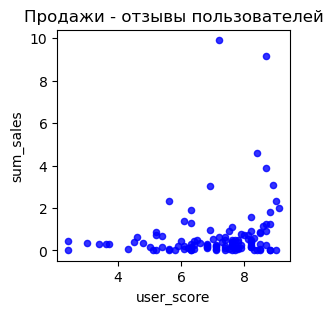

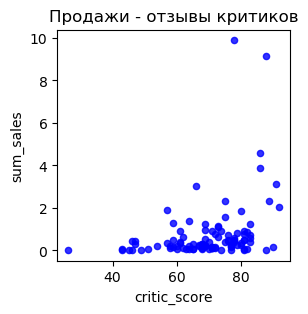

Корреляция с оценками пользователей: 0.19758263411038599
Корреляция с оценками критиков: 0.3208028695360785



In [68]:
#Сделаю цикл чтобы посмотреть графики и корреляцию для оставшихся 4х платформ их топа
top = ['PS3', 'X360', 'XOne', '3DS']

for platform in top:
    print('Графики для', platform)
    user_score = df_relevant[(df_relevant["user_score"] < 555) & (df_relevant["platform"] == platform)]
    user_score.plot(x='user_score', y='sum_sales', kind='scatter', color="Blue",figsize=(3,3), alpha=0.8, title='Продажи - отзывы пользователей')
    critic_score = df_relevant[(df_relevant["critic_score"] < 555) & (df_relevant["platform"] == platform)]
    critic_score.plot(x='critic_score', y='sum_sales', kind='scatter', color="Blue",figsize=(3,3), alpha=0.8, title='Продажи - отзывы критиков')
    plt.show()
    print('Корреляция с оценками пользователей:',user_score['user_score'].corr(user_score['sum_sales']))
    print('Корреляция с оценками критиков:',critic_score['critic_score'].corr(critic_score['sum_sales']))
    print()

Для всех топ 5 платформ корреляции между оценками пользователей и продажами нет \
Самая значительная корреляция с оценками критиков на платформе Xone 0,42, однако и эта цифра говорит о том, что есть слабо выраженная линейная связь \
На остальных платформах связь с оценками критиков выражена еще слабее от 0.3 до 0.4

#### 3.8 Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами

In [69]:
genres = df_relevant.pivot_table(index=['genre'], values='sum_sales', aggfunc=['median', 'mean','count'])
genres.columns=('Медиана продаж','Среднее по продажам','Количество игр')
genres.sort_values(by='Медиана продаж', ascending=False)


,Медиана продаж,Среднее по продажам,Количество игр
genre,,,
Shooter,0.440,1.296723,235
Sports,0.240,0.675634,268
Platform,0.210,0.717647,85
Role-Playing,0.140,0.521081,370
Racing,0.140,0.465217,115
Fighting,0.130,0.408165,109
Action,0.120,0.427856,1031
Misc,0.120,0.442917,192
Simulation,0.120,0.439000,80


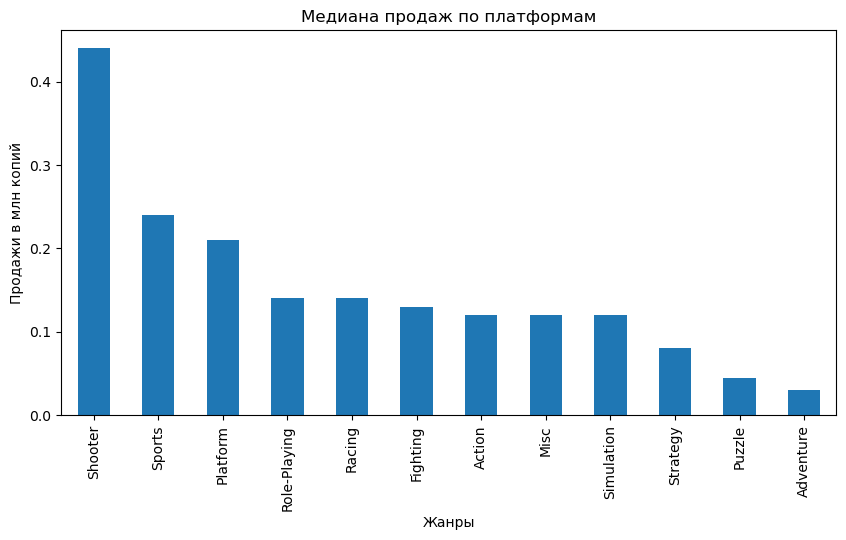

In [70]:
genres['Медиана продаж'].sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title('Медиана продаж по платформам')
plt.ylabel('Продажи в млн копий')
plt.xlabel('Жанры')
plt.show()


Для анализа количества продаж использую медиану. С больим отрывом лидирует жанр - шутер 0,44 млн копий, хотя по количеству ирг он на 5м месте, следователньо у этого жанра больше успеных игр. На втором месте спорт игры 0,24\
Экшн, по количеству игр в три раза больше чем его сосед ролевые игры (1031 против 370) однако по медиане экшн игры сильно уступают шутерам, медиана 0,12 млн копий \
Внизу списка паззлы и приключения

## 4 Составьте портрет пользователя каждого региона

#### 4.1 Определите для пользователя каждого региона (NA, EU, JP) Самые популярные платформы (топ-5). Опишите различия в долях продаж.

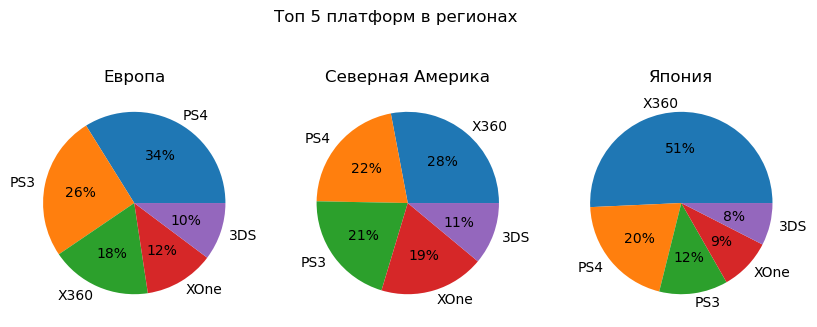

In [44]:
platform_sales = df_relevant.pivot_table(index='platform', values=['eu_sales', 'na_sales', 'jp_sales'], aggfunc='sum' )
eu_platform_sales = platform_sales['eu_sales'].sort_values(ascending=False).head(5)
na_platform_sales = platform_sales['na_sales'].sort_values(ascending=False).head(5)
jp_platform_sales = platform_sales['jp_sales'].sort_values(ascending=False).head(5)

fig, (one, ax2, ax3) = plt.subplots(1,3, figsize=(10,4))
fig.suptitle('Топ 5 платформ в регионах')
one.pie(eu_platform_sales, autopct='%1.0f%%', labels=eu_platform_sales.index)
one.set_title('Европа')
ax2.pie(na_platform_sales, autopct='%1.0f%%', labels=na_platform_sales.index)
ax2.set_title('Северная Америка')
ax3.pie(jp_platform_sales, autopct='%1.0f%%', labels=na_platform_sales.index)
ax3.set_title('Япония')
plt.show()

EU_sales — продажи в Европе - первое место PS4 -34%, второе PS3-26%, вместе sony занимает в Европе большу часть рынка \

NA_sales — продажи в Северной Америке X 360 - лидирует по количеству проданных копий, PS3 - 21%, PS4 - 22% \

JP_sales — продажи в Японии 3DS - занимает 51%, sony гораздо менее популярна -PS3+PS4-29%

#### 4.2 Самые популярные жанры (топ-5). Поясните разницу.

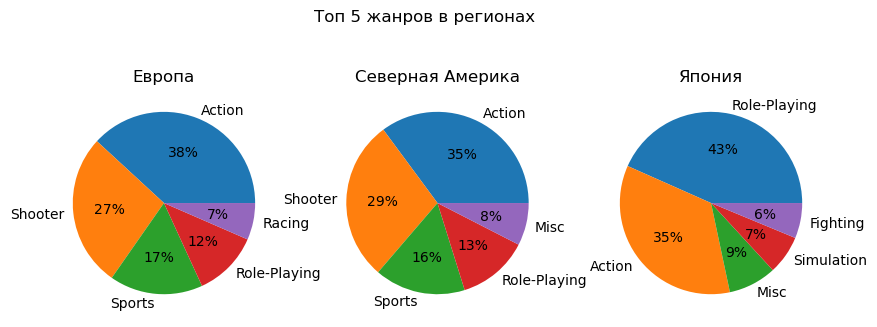

In [45]:
genre_sales = df_relevant.pivot_table(index='genre', values=['eu_sales', 'na_sales', 'jp_sales'], aggfunc='sum' )
eu_genre_sales = genre_sales['eu_sales'].sort_values(ascending=False).head(5)
na_genre_sales = genre_sales['na_sales'].sort_values(ascending=False).head(5)
jp_genre_sales = genre_sales['jp_sales'].sort_values(ascending=False).head(5)

fig, (one, ax2, ax3) = plt.subplots(1,3, figsize=(10,4))
fig.suptitle('Топ 5 жанров в регионах')
one.pie(eu_genre_sales, autopct='%1.0f%%', labels=eu_genre_sales.index)
one.set_title('Европа')
ax2.pie(na_genre_sales, autopct='%1.0f%%', labels=na_genre_sales.index)
ax2.set_title('Северная Америка')
ax3.pie(jp_genre_sales, autopct='%1.0f%%', labels=jp_genre_sales.index)
ax3.set_title('Япония')
plt.show()

Жанр Экшн лидирует в Европе и Северной Америке, шутер в обоих регионах занимает второе место, спорт и ролевый игры 3 и 4 место сообтетственно. Портрет предпочтений для Европы и Северное Америки очень похож. \
Япония отличается от других регионов, не самые популярные в Европе и Америке ролевые игры - тут на первом месте, вместе с тем экшн всего на втором месте и по процентам не уступает популярности в Америке, остальные жанры не выделяются

#### 4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе

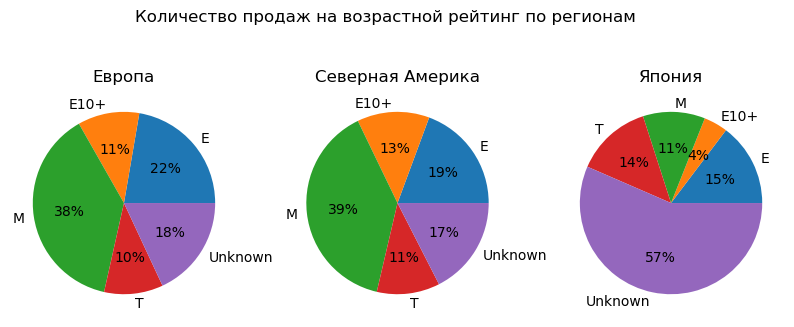

In [46]:
esrb = df_relevant.pivot_table(index='rating', values=['eu_sales', 'na_sales', 'jp_sales'], aggfunc='sum' )
eu_esrb = esrb['eu_sales']
na_esrb = esrb['na_sales']
jp_esrb = esrb['jp_sales']

fig, (eu, na, jp) = plt.subplots(1,3, figsize=(10,4))
fig.suptitle('Количество продаж на возрастной рейтинг по регионам')
eu.pie(eu_esrb, autopct='%1.0f%%', labels=eu_esrb.index)
eu.set_title('Европа')
na.pie(na_esrb, autopct='%1.0f%%', labels=na_esrb.index)
na.set_title('Северная Америка')
jp.pie(jp_esrb, autopct='%1.0f%%', labels=jp_esrb.index)
jp.set_title('Япония')
plt.show()

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Один из подводных камней этого проекта. Суть его в том, что часто коллеги в самом начале «тетрадки» пропуски в 'rating' не обрабатывают, оставляют NaN, и соответственно во время анализа и/или построении графиков игры без рейтингов «теряются». Но у тебя здесь всё отлично.</div>


E10+ - Для всех от 10 лет и старше \
T - Подросткам, 13+ \
M - Для взрослых, 17+ \
E - все возрасты \


В Европе и Северное Америке игра для взрослых пользуются популярностью, хотя для того чтобы обебзопасить себя игровые студии часто завышают рейтинг и ставят  18+ там,где в этом нет необходимости. \
Картина по всем категориям в Европе и Америке очень похода. Япония сильно отличается и большинство игр без рейтинга.

## 5. Проверьте гипотезы

#### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые \
Альтернативаня - Средние пользовательские рейтинги платформ Xbox One и PC разные \
Применю ttest для сравнения 2х выборок

In [47]:


# гтовлю срез, исключаю заглушку 555
xone = df_relevant.query('platform == "XOne" and user_score < 555')
pc = df_relevant.query('platform == "PC" and user_score < 555')

alpha = 0.05
#если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(xone['user_score'],pc['user_score'],equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
    
print(pc['user_score'].mean())
print(xone['user_score'].mean())

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу
6.428640776699027
6.52142857142857


Вероятность получить такие же или более выраженные различия между выборками при условии, что нулевая гипотеза о равенстве средних верна - 54,9% Различия между средними пользовательскими рейтингами для Xbox One и PC не являются статистически значимыми

#### 5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза -жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые \
Альтернативаня - Средние пользовательские рейтинги платформ Xbox One и PC разные \
Применю ttest 

In [48]:
action = df_relevant.query('genre == "Action" and user_score < 555')
sports = df_relevant.query('genre == "Sports" and user_score < 555')

alpha = 0.05
#если p-value окажется меньше него, отвергнем гипотезу
#выборки не равны по размеру, применим equal_var=False
results = st.ttest_ind(action['user_score'], sports['user_score'],equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
    
print(action['user_score'].mean())
print(sports['user_score'].mean())

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу
6.825047801147237
5.455897435897437


Вероятность получить такие же или более выраженные различия между выборками при условии, что нулевая гипотеза о равенстве средних верна стремится к нулю. Различия между средними пользовательскими рейтингами для жанров Action  и Sport являются статистически значимыми 

## 6 Вывод

Основной вопрос на который надо ответить - это нужно выявить определяющие успешность игры закономерности исходя из данных. Жанр, оценки, рейтинг, рынки на которых популярны те или иные игры. Можно выделить игровые хиты, за актуальный период. Для планирования рекламы и закупок. 
Можно сделать вывод, что регионы Европа и Северная Америка очень похожи между собой, в то время как Япония более самобытна.


В ходе исследования удалось выяснить, чо наичная с 90х годов продажи игр увеличивались кратно с каждым годом, после 2011 наметился спад, далее продажи были более стабильными. \
Самые большие объемы продаж за все время были у Sony(PS2, PS3), Microsoft(X360) и Nintendo(Wii) \
Sony и Microsoft так же входят в топ по количеству выпускаемых игр, 
Nintendo DS - на втором месте по количеству игр, однако на 5 по продажам \
Средний срок жизни консоли 5-6 лет, \
Выявлены 2 платформы которые набирают популярность это PS4 и Xone их продажи в 2016 больше чем у всех остальных платформ, при этом у Sony в 2 раза больше сумма продажи чем у Xone. \
Удалось выяснить, что оценка пользователя не имеет корреляции с продажами, оценки критиков имеют слабо выраженную линейную корреляцию \
ТОП 3 популярных жанра Экшн, Шутер, Ролевая игра - все вместе это 64% всех выпускаемых игр \
Самая популярная платформа в Европе - Sony PS3 и 4 занимают 60%!

В Северной Америке PS 4 и Х360 - занимают половину рынка. \
В Японии х360 - 51% 
По жанрам - Экшн во всех трех регионах занимает чуть больше 35% и лидирует в Европе и Америке \
В Японии ролевые игры занимают 43% \
По жанрам и платформам Амперика и Европы выглядят похоже, в то время как Япония сильно отличается \
В Европе и Америке 38 и 39% игр в рейтинге 17+ \
В Японии 57% - рейтинг не определен 

Жанр и платформа определяют успех в значитльной форме \
В Европе и Америке не пренебрегают играми 17+, в Японии спрос на них сильн меньше (11%) /
______________________
- Можно предположить, что в 2017 году наибольшей популярностью будут пользоваться PS4 и XOne. Даже если говорить про Японию, где % занимет Х360, продажи этой платформы к 2016 сошли на нет, а PS4 наоброт, набирает популярность
- Самые продаваемые жанры - шутеры и спорт, - на них следует сделать упор. Экш игры не смотря на большое количество игр проигрывают шутерам по медианным продажам. 
- Есть слабая корреляция с оценками критиков, стоит боратить на это внимание. Корреляции с оценками пользователей не выявлено.
- В Европе и Америке большей популярностью пользуются игры с рейтингом 17+ и без ограничения по возрасту. В Японии действует своя система возрастных рейтингов 